# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN on augmented images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [0]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 36s 0us/step


### 2. Visualize the First 24 Training Images

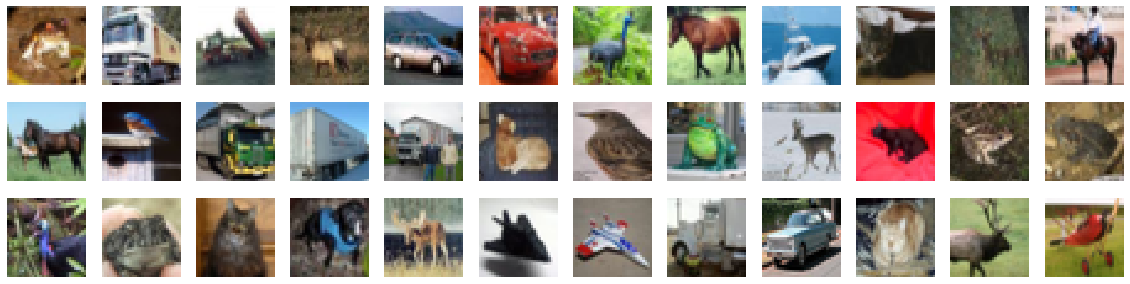

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [0]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255 

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [0]:
from keras.utils import np_utils

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Create and Configure Augmented Image Generator

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(x_train)

### 6. Visualize Original and Augmented Images

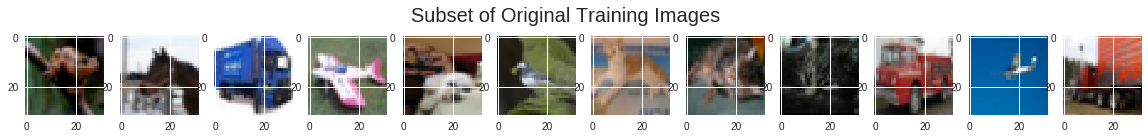

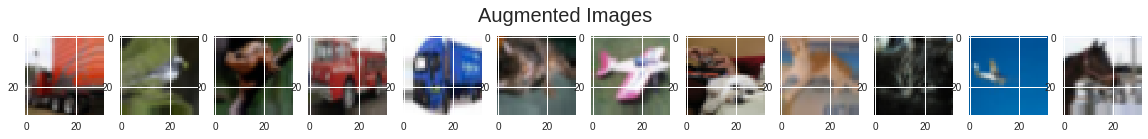

In [0]:
import matplotlib.pyplot as plt

# take subset of training data
x_train_subset = x_train[:12]

# visualize subset of training data
fig = plt.figure(figsize=(20,2))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(x_train_subset, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

### 7. Define the Model Architecture 

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, AveragePooling2D
model=Sequential()
model.add(Conv2D(filters=200, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=600,kernel_size=2,padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=700,kernel_size=2,padding='same', activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=800,kernel_size=2,padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 200)       2600      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 200)       0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 200)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 600)       480600    
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 600)       0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 600)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 700)         1680700   
__________

### 8. Compile the Model 

In [0]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 9. Train the Model 

In [0]:
from keras.callbacks import ModelCheckpoint   

batch_size = 1024
epochs = 100

# train the model
checkpointer = ModelCheckpoint(filepath='aug_model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit_generator(datagen_train.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs, verbose=2, callbacks=[checkpointer],
                    validation_data=(x_valid, y_valid),
                    validation_steps=x_valid.shape[0] // batch_size)

Epoch 1/100
 - 76s - loss: 2.5235 - acc: 0.1193 - val_loss: 2.2580 - val_acc: 0.2314

Epoch 00001: val_loss improved from inf to 2.25797, saving model to aug_model.weights.best.hdf5
Epoch 2/100
 - 80s - loss: 2.1898 - acc: 0.1973 - val_loss: 2.1169 - val_acc: 0.2752

Epoch 00002: val_loss improved from 2.25797 to 2.11690, saving model to aug_model.weights.best.hdf5
Epoch 3/100
 - 73s - loss: 1.9348 - acc: 0.2991 - val_loss: 1.9465 - val_acc: 0.3142

Epoch 00003: val_loss improved from 2.11690 to 1.94652, saving model to aug_model.weights.best.hdf5
Epoch 4/100
 - 74s - loss: 1.8197 - acc: 0.3472 - val_loss: 1.9056 - val_acc: 0.3308

Epoch 00004: val_loss improved from 1.94652 to 1.90559, saving model to aug_model.weights.best.hdf5
Epoch 5/100
 - 74s - loss: 1.6999 - acc: 0.3875 - val_loss: 1.7003 - val_acc: 0.4400

Epoch 00005: val_loss improved from 1.90559 to 1.70032, saving model to aug_model.weights.best.hdf5
Epoch 6/100
 - 74s - loss: 1.6168 - acc: 0.4169 - val_loss: 1.5915 - val_a

### 10. Load the Model with the Best Validation Accuracy

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('aug_model.weights.best.hdf5')

### 11. Calculate Classification Accuracy on Test Set

In [0]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.883


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [0]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

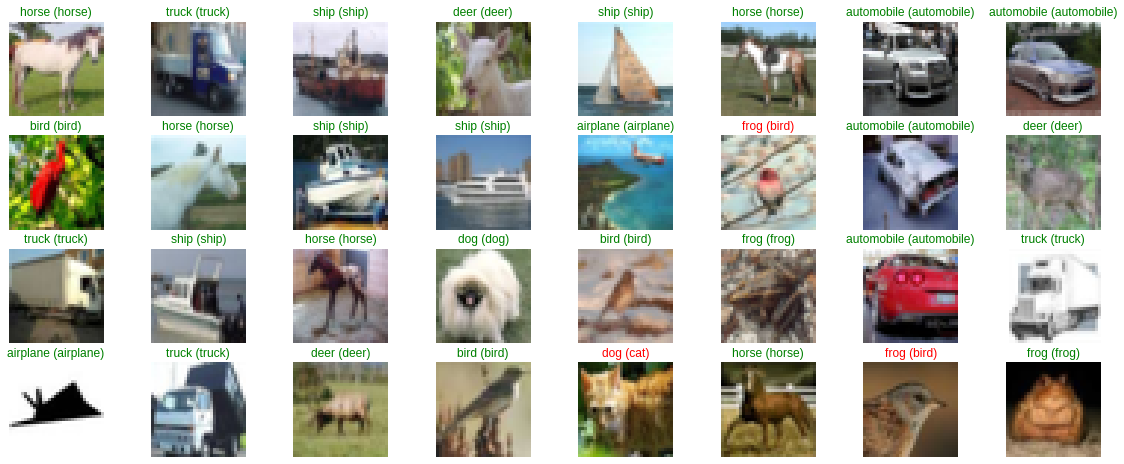

In [0]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))